<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/Convert_signals_to_Time_Domain_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time-Domain Visualization

Time-domain visualization is a way of representing and analyzing signals by plotting the signal's amplitude (y-axis) against time (x-axis).

### Characteristics of Time-Domain Visualization

- Displays how the signal changes over time
- Amplitude is typically plotted on the y-axis and time on the x-axis
- Useful for analyzing transient responses, wave propagation, and energy flow in circuits and systems
- Commonly used with oscilloscopes to view real-world signals in the time domain

### Advantages of Time-Domain Analysis

- Provides insight into the flow of mechanical and electrical energies in a system
- Enables separation of desired signals from extraneous signals like reflections and noise based on timing
- Useful for circuit designs with antennas where stray signals need to be identified

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install --upgrade mne

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [13]:
# Load the EEG data
raw = mne.io.read_raw_gdf('/content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf', preload=True)

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...


In [14]:
# Select only EEG channels
raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawGDF | A1_CE_baseline.gdf, 32 x 95776 (187.1 s), ~23.4 MB, data loaded>

In [15]:
# Extract data and times
data, times = raw[:]

In [16]:
# Select the data for a single channel, e.g., the first EEG channel
channel_data = data[0]

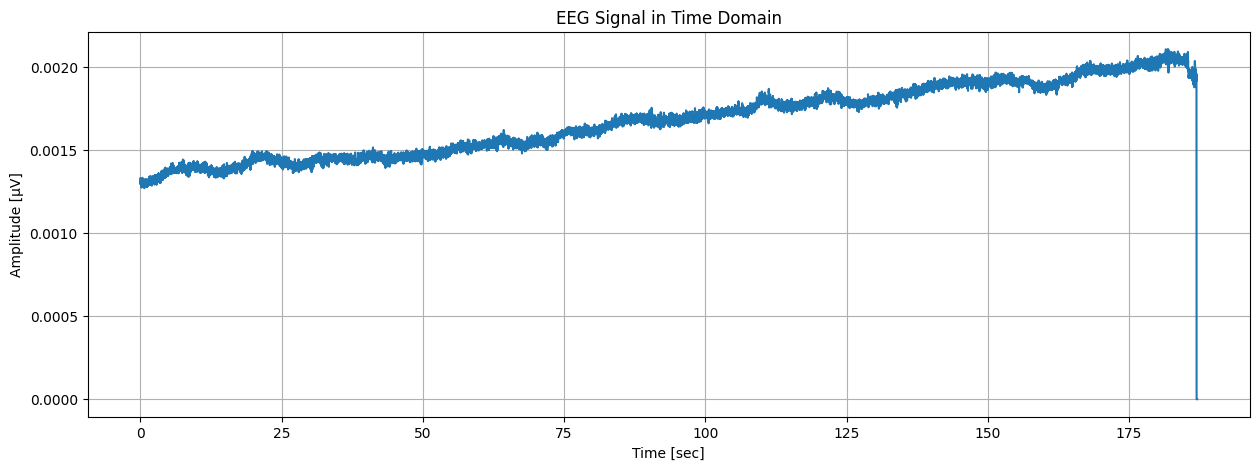

In [17]:
# Plot the time-domain signal
plt.figure(figsize=(15, 5))
plt.plot(times, channel_data)
plt.title('EEG Signal in Time Domain')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [µV]')
plt.grid(True)
plt.show()

### Using the MNE library to visualize time-domain signals for all .gdf files in a specified folder and then saves the plots to a specified output folder

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!pip install --upgrade mne

In [20]:
import os
import mne
import matplotlib.pyplot as plt

In [21]:
# Define the folder containing the .gdf files and the folder to save the plots
input_folder_path = '/content/drive/MyDrive/BCI_Database/gdf'
output_folder_path = '/content/drive/MyDrive/BCI_Database/gdf/Time_Domain_Visualization_Images/'

In [22]:
# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

In [23]:
# Loop through all files in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.gdf'):
        # Construct the full file path
        file_path = os.path.join(input_folder_path, filename)

        # Load the .gdf file
        raw = mne.io.read_raw_gdf(file_path, preload=True)

        # Extract data from the raw object
        data = raw.get_data()
        times = raw.times

        # Loop through each channel in the data
        for i, channel_data in enumerate(data):
            # Plot the time-domain signal
            plt.figure(figsize=(10, 4))
            plt.plot(times, channel_data)
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.title(f'Time-Domain Signal - {filename} - Channel {i}')

            # Save the plot as an image
            plot_file_path = os.path.join(output_folder_path, f'time_domain_{filename}_channel_{i}.png')
            plt.savefig(plot_file_path)
            plt.close()

        print(f'Time-domain plots created and saved for {filename} in {output_folder_path}')

print('Time-domain visualization complete for all .gdf files in the folder.')

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...
Time-domain plots created and saved for A1_CE_baseline.gdf in /content/drive/MyDrive/BCI_Database/gdf/Time_Domain_Visualization_Images/
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/C85_R2_acquisition.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating ra